# Descriptive statistics for people in some countries

The task of this project is to provide some answers for questions considering this dataset
1. How many men and women are presented in this dataset ('sex' feature)?
2. What is average women's age ('age' feature)?
3. How many Germans are there ('native-coubntry' feature)?
4. What are the average and standard deviation values for age of those earning more than 50K per year ('income' feature)?
5. What are the average and standard deviation values for age of those earning less than 50K per year ('income' feature)?
6. Is it true that people earning more than 50K have higher education('education' feature values: 'Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate')?
7. Present age statistics for each race and sex ('race' and 'sex' features) using 'groupby' and 'describe' pandas methods. Find out the age of the oldest male american eskimo.
8. Compare the share of people earning more than 50K among single and married men ('marital-status' feature). 
9. What is maximum hours per week value in dataset ('hoursPerWeek' feature)? How many people are working that much? What is the percentage of people earning more than 50K among them?
10. Calculacte average hours per week for each country for people earning more and less 50K.

In [341]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [342]:
adult = pd.read_csv('./data/adult.csv')

In [343]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capitalGain     32561 non-null  int64 
 11  capitalLoss     32561 non-null  int64 
 12  hoursPerWeek    32561 non-null  int64 
 13  nativeCountry   31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [344]:
adult.describe()

,age,fnlwgt,education-num,capitalGain,capitalLoss,hoursPerWeek
count,32561.00,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,189778.37,10.08,1077.65,87.30,40.44
std,13.64,105549.98,2.57,7385.29,402.96,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117827.00,9.00,0.00,0.00,40.00
50%,37.00,178356.00,10.00,0.00,0.00,40.00
75%,48.00,237051.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [345]:
adult.shape

(32561, 15)

In [346]:
adult.isna().mean()

age              0.00
workclass        0.06
fnlwgt           0.00
education        0.00
education-num    0.00
marital-status   0.00
occupation       0.06
relationship     0.00
race             0.00
sex              0.00
capitalGain      0.00
capitalLoss      0.00
hoursPerWeek     0.00
nativeCountry    0.02
income           0.00
dtype: float64

Text(0.5, 1.0, 'Missing values heatmap')

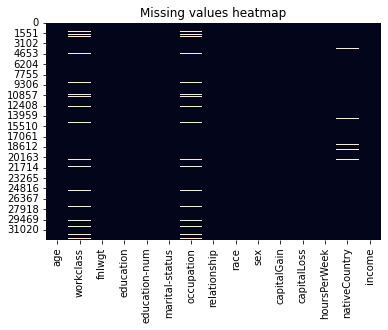

In [347]:
import seaborn as sns
sns.heatmap(adult.isnull(), cbar = False).set_title("Missing values heatmap")

We have some missing values for 'workclass', 'occupation', 'nativeCountry' features.

Assuming that statistically significant value is 5% lets drop entries where 'nativeCountry' is 'NaN'

In [348]:
adult.dropna(subset=['nativeCountry'], inplace=True)

The questions about dataset doesn't consider 'workclass' or 'occupation' so let's drop those columns

In [349]:
adult.drop(['workclass', 'occupation'], axis = 1, inplace = True)

In [350]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31978 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31978 non-null  int64 
 1   fnlwgt          31978 non-null  int64 
 2   education       31978 non-null  object
 3   education-num   31978 non-null  int64 
 4   marital-status  31978 non-null  object
 5   relationship    31978 non-null  object
 6   race            31978 non-null  object
 7   sex             31978 non-null  object
 8   capitalGain     31978 non-null  int64 
 9   capitalLoss     31978 non-null  int64 
 10  hoursPerWeek    31978 non-null  int64 
 11  nativeCountry   31978 non-null  object
 12  income          31978 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.4+ MB


In [352]:
adult.describe(include='O')

,education,marital-status,relationship,race,sex,nativeCountry,income
count,31978,31978,31978,31978,31978,31978,31978
unique,16,7,6,5,2,41,2
top,HS-grad,Married-civ-spouse,Husband,White,Male,United-States,<=50K
freq,10368,14692,12947,27430,21370,29170,24283


In [353]:
adult.head()

,age,fnlwgt,education,education-num,marital-status,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,income
0,39,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,<=50K
2,38,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,<=50K


In [354]:
# 1. 
print(f"We have {sum(adult['sex']=='Male')} males, {sum(adult['sex']=='Female')} females.")

We have 21370 males, 10608 females.


Considering that world's sex ratio is almost equal (50.42% males 49.58% females') we should state that dataset is [not represenatative][id]. 


[id]: https://statisticstimes.com/demographics/world-sex-ratio.php#:~:text=Gender%20ratio%20in%20the%20World&text=The%20population%20of%20females%20in,101.68%20males%20per%20100%20females.

In [372]:
#2.
print(f"The average women's age is : {adult['age'][adult['sex']=='Female'].mean():.2f}.")

The average women's age is : 36.85.


In [373]:
#3. 
print(f"The percentage of Germans in dataset is : {sum(adult['nativeCountry']=='Germany')/adult.shape[0]*100:.2f}%.")

The percentage of Germans in dataset is : 0.43%.


In [374]:
# values for 'income' feature.
set(adult['income'])

{'<=50K', '>50K'}

In [375]:
#4.
print(f"Some information about the age of people earning more than 50K per year:\n \
    \tAverage value : \t{adult['age'][adult['income'] == '>50K'].mean():.2f}\n \
    \tStandard deviation : \t{adult['age'][adult['income'] == '>50K'].std():.2f}")

Some information about the age of people earning more than 50K per year:
     	Average value : 	44.25
     	Standard deviation : 	10.53


In [376]:
#5.
print(f"Some information about the age of people earning less than 50K per year:\n \
    \tAverage value : \t{adult['age'][adult['income'] == '<=50K'].mean():.2f}\n \
    \tStandard deviation : \t{adult['age'][adult['income'] == '<=50K'].std():.2f}")

Some information about the age of people earning less than 50K per year:
     	Average value : 	36.78
     	Standard deviation : 	14.05


In [384]:
#6
print(f"The most wide-spread education of those earning more than 50K per year is : {adult['education'][adult['income'] == '>50K'].mode()[0]}")
highEd = ['Bachelors', 
          'Prof-school', 
          'Assoc-acdm', 
          'Assoc-voc', 
          'Masters', 
          'Doctorate']
cnt50K = sum(adult['income'] == '>50K')
cntHighEd50K = sum(adult['education'][adult['income'] == '>50K'].isin(highEd))
print(f"Share of those having higher education among well-endowed people earning more than 50K per year : {(cntHighEd50K/cnt50K*100):.2f}%")
print(f"Share of those having no higher education among well-endowed people earning more than 50K per year : {((1 - cntHighEd50K/cnt50K)*100):.2f}%")

The most wide-spread education of those earning more than 50K per year is : Bachelors
Share of those having higher education among well-endowed people earning more than 50K per year : 57.56%
Share of those having no higher education among well-endowed people earning more than 50K per year : 42.44%


In [385]:
#7.
p = adult[['age', 'race']].groupby('race').describe()
p

age                                          
                      count  mean   std   min   25%   50%   75%   max
race                                                                 
Amer-Indian-Eskimo   311.00 37.17 12.45 17.00 28.00 35.00 45.50 82.00
Asian-Pac-Islander   956.00 37.85 13.13 17.00 27.00 36.00 46.00 90.00
Black               3028.00 37.82 12.84 17.00 28.00 36.00 46.00 90.00
Other                253.00 33.25 11.64 17.00 25.00 31.00 41.00 77.00
White              27430.00 38.75 13.78 17.00 28.00 37.00 48.00 90.00

In [393]:
print(f"The oldest American eskimo male is {p[('age',   'max')]['Amer-Indian-Eskimo']:.0f} years old.")

The oldest American eskimo male is 82 years old.


In [395]:
#8.
married = ['Married-civ-spouse', 'Married-spouse-absent','Married-AF-spouse']
adult['married'] = adult['marital-status'].isin(married)
total = adult[['married', 'income']][adult['sex'] == 'Male'].groupby('married').agg(len)
married = adult[['married', 'income']][adult['sex'] == 'Male'][adult['income'] == '>50K'].groupby('married').agg(len)
married/total*100

C:\Users\kdogu\AppData\Local\Temp\ipykernel_18092\2705137555.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  married = adult[['married', 'income']][adult['sex'] == 'Male'][adult['income'] == '>50K'].groupby('married').agg(len)


,income
married,
False,8.43
True,44.07


In [399]:
#9.
maxHoursPerWeek = adult['hoursPerWeek'].max()
cntHoursPerWeek = sum(adult['hoursPerWeek'] == adult['hoursPerWeek'].max())
cntHoursPerWeekMaxUSD = sum((adult.income == '>50K') & (adult.hoursPerWeek == adult['hoursPerWeek'].max()))
print(f"Maximum hours per week value: {maxHoursPerWeek}")
print(f"There are {cntHoursPerWeek} people working that much")
print(f"The percentage of people working that much among people earning more than 50K : {cntHoursPerWeekMaxUSD/cntHoursPerWeek*100:.2f}%")

Maximum hours per week value: 99
There are 83 people working that much
The percentage of people working that much among people earning more than 50K : 30.12%


In [277]:
#10
pd.options.display.float_format = '{:.2f}'.format
avgHPWmaxIncome = adult[adult['income'] == '>50K'][['nativeCountry', 'hoursPerWeek']].groupby('nativeCountry').agg('mean').rename(columns={"hoursPerWeek": "avgHPWmaxIncome"})
avgHPWminIncome = adult[adult['income'] == '<=50K'][['nativeCountry', 'hoursPerWeek']].groupby('nativeCountry').agg('mean').rename(columns={"hoursPerWeek": "avgHPWminIncome"})
res = pd.concat([avgHPWmaxIncome, avgHPWminIncome], axis = 1)
res

,avgHPWmaxIncome,avgHPWminIncome
nativeCountry,,
Cambodia,40.00,41.42
Canada,45.64,37.91
China,38.90,37.38
Columbia,50.00,38.68
Cuba,42.44,37.99
Dominican-Republic,47.00,42.34
Ecuador,48.75,38.04
El-Salvador,45.00,36.03
England,44.53,40.48


In [278]:
add_res = res.dropna()
add_res[add_res.avgHPWmaxIncome < add_res.avgHPWminIncome]

,avgHPWmaxIncome,avgHPWminIncome
nativeCountry,,
Cambodia,40.00,41.42
Guatemala,36.67,39.36
Laos,40.00,40.38
Portugal,41.50,41.94


There are 4 countries where people in average working less earn more.